# ML ALGORITHMS

## K-NEAREST NEIGHBOURS

In [484]:
def knn_acc(X_train,y_train,X_test,y_test):
    from sklearn.neighbors import KNeighborsClassifier
    scores_test=[]
    scores_train=[]
    k_range=range(1,50)
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors = k, weights='uniform')
        knn.fit(X_train,y_train)
        scores_test.append(knn.score(X_test,y_test))
        scores_train.append(knn.score(X_train,y_train))

    optimum_k = scores_test.index(max(scores_test))+1
    return max(scores_test),scores_train[optimum_k-1],optimum_k

## LOGISTIC REGRESSION

In [472]:
def logistic_reg_acc(X_train,y_train,X_test,y_test):
    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression()
    clf.fit(X_train,y_train)
    return clf.score(X_test,y_test),clf.score(X_train,y_train)

## SUPPORT VECTOR MACHINES

In [475]:
def svm_acc(X_train,y_train,X_test,y_test):
    
    C = np.logspace(-1,1,3)
    gamma = np.logspace(-3,1,5)
    max_acc_test=[]
    max_acc_train=[]
    gamma_max=[]
    for this_C in C:
        scores_test = []
        scores_train = []
        for this_gamma in gamma:
            clf = SVC(C=this_C,kernel='rbf',gamma=this_gamma)
            clf.fit(X_train,y_train)
            scores_test.append(clf.score(X_test,y_test))
            scores_train.append(clf.score(X_train,y_train))
    
        max_acc_test.append(max(scores_test))
        max_acc_train.append(scores_test.index(max(scores_test)))
        gamma_max.append(gamma[scores_test.index(max(scores_test))])


    return max(max_acc_test),max_acc_train[max_acc.index(max(max_acc_test))],C[max_acc.index(max(max_acc_test))],gamma_max[max_acc_test.index(max(max_acc_test))]

## DECISION TREES

In [476]:
def decision_tree_acc(X_train,y_train,X_test,y_test):
    
    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
    clf.fit(X_train,y_train)

    scores_test=[]
    scores_train=[]
    max_depth_range=range(1,clf.tree_.max_depth)
    for i in max_depth_range:
        clf_1 = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=i)
        clf_1.fit(X_train,y_train)
        scores_test.append(clf_1.score(X_test,y_test))
        scores_train.append(clf_1.score(X_train,y_train))

    return max(scores_test),scores_train[scores_test.index(max(scores_test))],scores_test.index(max(scores_test))+1     

## RANDOM FOREST

In [461]:
# random forest

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_features=22,random_state=0,max_depth=13)
clf.fit(X_train,y_train)
print('score on test dataset=',clf.score(X_test,y_test))
print('score on train dataset=',clf.score(X_train,y_train))

score on test dataset= 0.96
score on train dataset= 0.99989898989899


# DATASET SIMULATIONS

## EXPERIMENT 1

In [4]:

import numpy
import random
import math
import pandas as pd


pi=math.pi

# number of training datas to be generated
number_of_training_data = 11000

# UDFs to generate features of the ball
def getvelo():
    lower_speed = 50
    higher_speed = 120
    return random.uniform(lower_speed,higher_speed)
def gettheta():
    return random.uniform(30*pi/180,70*pi/180)
def getphi():
    return random.uniform(0,2*pi)
def dist(r1,phi1,r2,phi2):
    return math.sqrt(r1**2+r2**2-2*r1*r2*math.cos(phi2-phi1))

# setting up field positions
field_posn = [None]*11

field_posn[0] = (20,0)    #bowler
field_posn[1] = (20,pi)   #wicket keeper
field_posn[2] = (75,pi/8)    #long on
field_posn[3] = (25,15*pi/8)  #mid off
field_posn[4] = (27,pi/4)    # mid wicket
field_posn[5] = (75,pi/2)    #deep sq leg
field_posn[6] = (25,7*pi/8)  #fine leg
field_posn[7] = (75,9*pi/8)  #third man
field_posn[8] = (25,4*pi/3)  #backward point
field_posn[9] = (27,13*pi/8) #cover
field_posn[10] = (75,7*pi/4) #deep extra cover

average_speed_of_fielder = 10
    
#generating training dataset
velo=[]
Theta=[]
ball_range=[]
Phi=[]
caught_by=[]
#label_dict = {0:'No',1:'Yes',2:'Its a six!'}
output=[]

for i in range(number_of_training_data):
    v = getvelo()
    theta = gettheta()
    phi = getphi()
    label = 0
    
    g = 127008
    range_ball = ((v**2)*math.sin(2*theta))/g*1000
    min_index = -1
    
    if range_ball<80:
        time_taken = (2*v)*math.cos(theta)/g*3600
        min_dist = dist(range_ball,phi,field_posn[0][0],field_posn[0][1])
        min_index = 0
      
        for i in range(1,10):
            new_dist = dist(range_ball,phi,field_posn[i][0],field_posn[i][1])
            if new_dist<min_dist:
                min_dist = new_dist
                min_index = i
      
        fielder_time = min_dist/average_speed_of_fielder
        if fielder_time<=time_taken:
            label = 1 
        else:
            min_index = -1
    
    caught_by.append(min_index)  
    velo.append(v)
    Theta.append(theta*180/pi)
    ball_range.append(range_ball)
    Phi.append(phi*180/pi)
    output.append(label)
output_dict = {'Speed of the ball (km/hr)':velo,'Angle of the ball with z axis (deg)':Theta,
               'Range of the ball (m)':ball_range,'Angle of the ball with x axis (deg)':Phi,'Caught by':caught_by,'Catch_label':output}
# creating output csv file
df = pd.DataFrame(output_dict)
#print(df)
df.to_csv('E:\\cricket_catches_experiment_1.csv',na_rep =-1,index = False)
print('done')

done


In [5]:
dataset = pd.read_csv('E:\\cricket_catches_experiment_1.csv')
dataset.head(25)

,Speed of the ball (km/hr),Angle of the ball with z axis (deg),Range of the ball (m),Angle of the ball with x axis (deg),Caught by,Catch_label
0,92.658013,31.124891,59.823418,284.854743,9,1
1,102.700681,50.149182,81.707548,239.373091,-1,0
2,64.021320,42.330729,32.131445,22.993473,4,1
3,50.973252,67.664654,14.382292,51.611556,-1,0
4,76.797127,62.566336,37.976724,106.965205,-1,0
5,61.891326,42.855106,30.075310,129.468893,6,1
6,75.714796,53.480944,43.173272,283.061040,9,1
7,86.560479,48.414081,58.575618,259.926288,-1,0
8,72.653923,46.641251,41.492915,2.913251,0,1
9,75.472442,62.219442,36.987711,154.306484,6,1


In [6]:
# test train split
from sklearn.model_selection import train_test_split
X = dataset.iloc[]

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0, test_size = 0.1, shuffle = True)

SyntaxError: invalid syntax (Temp/ipykernel_20040/3002241995.py, line 3)

In [486]:
test_acc,train_acc,k = knn_acc(X_train,y_train,X_test,y_test)
print("test accuracy =",test_acc)
print("train accuracy =",train_acc)
print("k =",k)

test accuracy = 0.9527272727272728
train accuracy = 0.9694949494949495
k = 5


## EXPERIMENT 2

In [477]:
import numpy
import random
import math
import pandas as pd


pi=math.pi

# number of training datas to be generated
number_of_training_data = 11000

# UDFs to generate features of the ball
def getvelo():
    lower_speed = 50
    higher_speed = 120
    return random.uniform(lower_speed,higher_speed)
def gettheta():
    return random.uniform(30*pi/180,70*pi/180)
def getphi():
    return random.uniform(0,2*pi)
def dist(r1,phi1,r2,phi2):
    return math.sqrt(r1**2+r2**2-2*r1*r2*math.cos(phi2-phi1))

# setting up field positions
number_of_fielding_comb = 5
fielding_comb = [None]*number_of_fielding_comb


fielding_comb[0] = [(20,0),(20,pi),(75,pi/8),(25,15*pi/8),(27,pi/4),(75,pi/2),(25,7*pi/8),(75,9*pi/8),(25,4*pi/3),(27,13*pi/8),(75,7*pi/4)]    
fielding_comb[1] = [(20,0),(20,pi),(25,pi/8),(75,15*pi/8),(75,pi/6),(75,pi/2),(25,7*pi/8),(30,9*pi/8),(75,3*pi/2),(27,13*pi/8),(27,pi/4)]   
fielding_comb[2] = [(20,0),(20,pi),(25,pi/8),(25,15*pi/8),(27,13*pi/8),(27,pi/2),(75,7*pi/8),(75,9*pi/8),(75,3*pi/2),(75,7*pi/4),(75,pi/4)]
fielding_comb[3] = [(20,0),(20,pi),(25,pi/8),(75,15*pi/8),(27,13*pi/8),(75,pi/2),(25,7*pi/8),(25,9*pi/8),(27,3*pi/2),(27,7*pi/4),(27,pi/4)]
fielding_comb[4] = [(20,0),(20,pi),(75,pi/8),(75,15*pi/8),(27,7*pi/4),(25,3*pi/2),(75,pi/4),(25,pi/2),(75,7*pi/8),(75,13*pi/8),(25,9*pi/8)]    
#fielding_comb[5] = [(20,0),(20,pi),()]    
#fielding_comb[6] = [(20,0),(20,pi),()] 
#fielding_comb[7] = [(20,0),(20,pi),()]
#fielding_comb[8] = [(20,0),(20,pi),()]
#fielding_comb[9] = [(20,0),(20,pi),()]
 

average_speed_of_fielder = 10
    
#generating training dataset
velo=[]
Theta=[]
ball_range=[]
Phi=[]
caught_by=[]
output=[]
fielder_1_r=[]
fielder_1_phi=[]
fielder_2_r=[]
fielder_2_phi=[]
fielder_3_r=[]
fielder_3_phi=[]
fielder_4_r=[]
fielder_4_phi=[]
fielder_5_r=[]
fielder_5_phi=[]
fielder_6_r=[]
fielder_6_phi=[]
fielder_7_r=[]
fielder_7_phi=[]
fielder_8_r=[]
fielder_8_phi=[]
fielder_9_r=[]
fielder_9_phi=[]
fielder_10_r=[]
fielder_10_phi=[]
fielder_11_r=[]
fielder_11_phi=[]

for i in range(number_of_training_data):
    v = getvelo()
    theta = gettheta()
    phi = getphi()
    label = 0
    
    g = 127008
    range_ball = ((v**2)*math.sin(2*theta))/g*1000
    min_index = -1
    field_posn = fielding_comb[random.choice(range(5))]
    
    if range_ball<80:
      time_taken = (2*v)*math.cos(theta)/g*3600
      min_dist = dist(range_ball,phi,field_posn[0][0],field_posn[0][1])
      min_index = 0
      
      for i in range(1,10):
         new_dist = dist(range_ball,phi,field_posn[i][0],field_posn[i][1])
         if new_dist<min_dist:
             min_dist = new_dist
             min_index = i
      
      fielder_time = min_dist/average_speed_of_fielder
      if fielder_time<=time_taken:
         label = 1 
      else:
        min_index = -1
    
    fielder_1_r.append(field_posn[0][0])
    fielder_1_phi.append(field_posn[0][1])
    fielder_2_r.append(field_posn[1][0])
    fielder_2_phi.append(field_posn[1][1])
    fielder_3_r.append(field_posn[2][0])
    fielder_3_phi.append(field_posn[2][1])
    fielder_4_r.append(field_posn[3][0])
    fielder_4_phi.append(field_posn[3][1])
    fielder_5_r.append(field_posn[4][0])
    fielder_5_phi.append(field_posn[4][1])
    fielder_6_r.append(field_posn[5][0])
    fielder_6_phi.append(field_posn[5][1])
    fielder_7_r.append(field_posn[6][0])
    fielder_7_phi.append(field_posn[6][1])
    fielder_8_r.append(field_posn[7][0])
    fielder_8_phi.append(field_posn[7][1])
    fielder_9_r.append(field_posn[8][0])
    fielder_9_phi.append(field_posn[8][1])
    fielder_10_r.append(field_posn[9][0])
    fielder_10_phi.append(field_posn[9][1])
    fielder_11_r.append(field_posn[10][0])
    fielder_11_phi.append(field_posn[10][1])
    caught_by.append(min_index)  
    velo.append(v)
    Theta.append(theta*180/pi)
    ball_range.append(range_ball)
    Phi.append(phi*180/pi)
    output.append(label)
output_dict = {'Speed of the ball (km/hr)':velo,'Angle of the ball with z axis (deg)':Theta,
               'Range of the ball (m)':ball_range,'Angle of the ball with x axis (deg)':Phi,
               'fielder_1_r':fielder_1_r,'fielder_1_phi':fielder_1_phi,
               'fielder_2_r':fielder_2_r,'fielder_2_phi':fielder_2_phi,
               'fielder_3_r':fielder_3_r,'fielder_3_phi':fielder_3_phi,
               'fielder_4_r':fielder_4_r,'fielder_4_phi':fielder_4_phi,
               'fielder_5_r':fielder_5_r,'fielder_5_phi':fielder_5_phi,
               'fielder_6_r':fielder_6_r,'fielder_6_phi':fielder_6_phi,
               'fielder_7_r':fielder_7_r,'fielder_7_phi':fielder_7_phi,
               'fielder_8_r':fielder_8_r,'fielder_8_phi':fielder_8_phi,
               'fielder_9_r':fielder_9_r,'fielder_9_phi':fielder_9_phi,
               'fielder_10_r':fielder_10_r,'fielder_10_phi':fielder_10_phi,
               'fielder_11_r':fielder_11_r,'fielder_11_phi':fielder_11_phi,
               'Catch_label':output}
# creating output csv file
df = pd.DataFrame(output_dict)
#print(df)
df.to_csv('C:\\Users\\Krishna\\cricket_catches.csv',na_rep =-1,index = False)
print('done')

done


In [478]:
dataset = pd.read_csv('C:\\Users\\Krishna\\cricket_catches.csv')
dataset.head(25)

,Speed of the ball (km/hr),Angle of the ball with z axis (deg),Range of the ball (m),Angle of the ball with x axis (deg),fielder_1_r,fielder_1_phi,fielder_2_r,fielder_2_phi,fielder_3_r,fielder_3_phi,...,fielder_7_phi,fielder_8_r,fielder_8_phi,fielder_9_r,fielder_9_phi,fielder_10_r,fielder_10_phi,fielder_11_r,fielder_11_phi,Catch_label
0,117.133837,62.452086,88.594322,22.825375,20,0,20,3.141593,25,0.392699,...,2.748894,75,3.534292,75,4.712389,75,5.497787,75,0.785398,0
1,83.149495,37.433546,52.548551,215.240251,20,0,20,3.141593,25,0.392699,...,2.748894,30,3.534292,75,4.712389,27,5.105088,27,0.785398,1
2,101.628482,46.116301,81.258726,356.527453,20,0,20,3.141593,75,0.392699,...,0.785398,25,1.570796,75,2.748894,75,5.105088,25,3.534292,0
3,100.270528,66.054756,58.727313,283.263576,20,0,20,3.141593,25,0.392699,...,2.748894,30,3.534292,75,4.712389,27,5.105088,27,0.785398,1
4,65.792396,31.712665,30.480976,350.983451,20,0,20,3.141593,75,0.392699,...,0.785398,25,1.570796,75,2.748894,75,5.105088,25,3.534292,1
5,98.922310,40.949172,76.278336,221.571694,20,0,20,3.141593,25,0.392699,...,2.748894,25,3.534292,27,4.712389,27,5.497787,27,0.785398,0
6,64.041566,34.918258,30.312768,331.027219,20,0,20,3.141593,75,0.392699,...,0.785398,25,1.570796,75,2.748894,75,5.105088,25,3.534292,1
7,95.512710,56.711137,65.909002,192.007877,20,0,20,3.141593,25,0.392699,...,2.748894,25,3.534292,27,4.712389,27,5.497787,27,0.785398,0
8,57.079258,69.503773,16.826844,41.120084,20,0,20,3.141593,25,0.392699,...,2.748894,75,3.534292,75,4.712389,75,5.497787,75,0.785398,1
9,73.229564,56.455673,38.891306,285.151298,20,0,20,3.141593,75,0.392699,...,0.785398,25,1.570796,75,2.748894,75,5.105088,25,3.534292,1


In [ ]:
# test train split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0, test_size = 0.1, shuffle = True)

## EXPERIMENT 3

In [1]:
import numpy
import random
import math
import pandas as pd


pi=math.pi

# number of training datas to be generated
number_of_training_data = 11000

# UDFs to generate features of the ball
def getvelo():
    lower_speed = 50
    higher_speed = 120
    return random.uniform(lower_speed,higher_speed)
def gettheta():
    return random.uniform(30*pi/180,70*pi/180)
def getphi():
    return random.uniform(0,2*pi)
def dist(r1,phi1,r2,phi2):
    return math.sqrt(r1**2+r2**2-2*r1*r2*math.cos(phi2-phi1))

# setting up field positions
number_of_fielding_comb = 5
fielding_comb = [None]*number_of_fielding_comb


fielding_comb[0] = [(20,0),(20,pi),(75,pi/8),(25,15*pi/8),(27,pi/4),(75,pi/2),(25,7*pi/8),(75,9*pi/8),(25,4*pi/3),(27,13*pi/8),(75,7*pi/4)]    
fielding_comb[1] = [(20,0),(20,pi),(25,pi/8),(75,15*pi/8),(75,pi/6),(75,pi/2),(25,7*pi/8),(30,9*pi/8),(75,3*pi/2),(27,13*pi/8),(27,pi/4)]   
fielding_comb[2] = [(20,0),(20,pi),(25,pi/8),(25,15*pi/8),(27,13*pi/8),(27,pi/2),(75,7*pi/8),(75,9*pi/8),(75,3*pi/2),(75,7*pi/4),(75,pi/4)]
fielding_comb[3] = [(20,0),(20,pi),(25,pi/8),(75,15*pi/8),(27,13*pi/8),(75,pi/2),(25,7*pi/8),(25,9*pi/8),(27,3*pi/2),(27,7*pi/4),(27,pi/4)]
fielding_comb[4] = [(20,0),(20,pi),(75,pi/8),(75,15*pi/8),(27,7*pi/4),(25,3*pi/2),(75,pi/4),(25,pi/2),(75,7*pi/8),(75,13*pi/8),(25,9*pi/8)]    
#fielding_comb[5] = [(20,0),(20,pi),()]    
#fielding_comb[6] = [(20,0),(20,pi),()] 
#fielding_comb[7] = [(20,0),(20,pi),()]
#fielding_comb[8] = [(20,0),(20,pi),()]
#fielding_comb[9] = [(20,0),(20,pi),()]
 

average_speed_of_fielder = 10
    
#generating training dataset
velo=[]
Theta=[]
ball_range=[]
Phi=[]
caught_by=[]
output=[]
field_index=[]

for i in range(number_of_training_data):
    v = getvelo()
    theta = gettheta()
    phi = getphi()
    label = 0
    
    g = 127008
    range_ball = ((v**2)*math.sin(2*theta))/g*1000
    min_index = -1
    field_comb_index = random.choice(range(5))
    field_posn = fielding_comb[field_comb_index]
    
    if range_ball<80:
        time_taken = (2*v)*math.cos(theta)/g*3600
        min_dist = dist(range_ball,phi,field_posn[0][0],field_posn[0][1])
        min_index = 0
      
        for i in range(1,10):
            new_dist = dist(range_ball,phi,field_posn[i][0],field_posn[i][1])
            if new_dist<min_dist:
                min_dist = new_dist
                min_index = i
      
        fielder_time = min_dist/average_speed_of_fielder
        if fielder_time<=time_taken:
            label = 1 
        else:
            min_index = -1
    
    field_index.append(field_comb_index)
    caught_by.append(min_index)  
    velo.append(v)
    Theta.append(theta*180/pi)
    ball_range.append(range_ball)
    Phi.append(phi*180/pi)
    output.append(label)
output_dict = {'Speed of the ball (km/hr)':velo,'Angle of the ball with z axis (deg)':Theta,
               'Range of the ball (m)':ball_range,'Angle of the ball with x axis (deg)':Phi,
               'Field combination index':field_index,
               'Catch_label':output}
# creating output csv file
df = pd.DataFrame(output_dict)
#print(df)
df.to_csv('E:\\cricket_catches_experiment_3.csv',na_rep =-1,index = False)
print('done')

done


In [2]:
dataset_3 = pd.read_csv('E:\\cricket_catches_experiment_3.csv')
dataset_3.head(25)

,Speed of the ball (km/hr),Angle of the ball with z axis (deg),Range of the ball (m),Angle of the ball with x axis (deg),Field combination index,Catch_label
0,55.148667,40.508349,23.652601,174.692313,2,1
1,96.581324,68.512269,50.065554,238.892637,3,0
2,88.146858,44.947350,61.176110,5.914750,4,1
3,71.277903,68.736994,27.038163,216.932455,2,0
4,116.058719,57.755393,95.713613,266.327547,0,0
5,95.682732,48.404222,71.575202,331.552385,0,0
6,94.079823,48.435423,69.188147,54.205455,3,0
7,50.066123,38.308762,19.200001,294.602566,0,1
8,110.973603,49.515635,95.761429,188.864583,2,0
9,87.760401,53.407372,58.048268,99.191326,3,1


## EXPERIMENT 4

In [15]:
import numpy
import random
import math
import pandas as pd


pi=math.pi

# number of training datas to be generated
number_of_training_data = 11000

# UDFs to generate features of the ball
def getvelo():
    lower_speed = 50
    higher_speed = 120
    return random.uniform(lower_speed,higher_speed)
def gettheta():
    return random.uniform(30*pi/180,70*pi/180)
def getphi():
    return random.uniform(0,2*pi)
def dist(r1,phi1,r2,phi2):
    return math.sqrt(r1**2+r2**2-2*r1*r2*math.cos(phi2-phi1))

average_speed_of_fielder = 10
    
#generating training dataset
velo=[]
Theta=[]
ball_range=[]
Phi=[]
caught_by=[]
output=[]
fielder_1_r=[]
fielder_1_phi=[]
fielder_2_r=[]
fielder_2_phi=[]
fielder_3_r=[]
fielder_3_phi=[]
fielder_4_r=[]
fielder_4_phi=[]
fielder_5_r=[]
fielder_5_phi=[]
fielder_6_r=[]
fielder_6_phi=[]
fielder_7_r=[]
fielder_7_phi=[]
fielder_8_r=[]
fielder_8_phi=[]
fielder_9_r=[]
fielder_9_phi=[]
fielder_10_r=[]
fielder_10_phi=[]
fielder_11_r=[]
fielder_11_phi=[]

for i in range(number_of_training_data):
    v = getvelo()
    theta = gettheta()
    phi = getphi()
    label = 0
    
    g = 127008
    range_ball = ((v**2)*math.sin(2*theta))/g*1000
    min_index = -1
    
    # dividing field into 10 sections

    angle_1 = random.uniform(0,pi/8)
    angle_2 = random.uniform(pi/8,pi/4)
    angle_3 = random.uniform(pi/4,pi/2)
    angle_4 = random.uniform(pi/2,7*pi/8)
    angle_5 = random.uniform(7*pi/8,pi)
    angle_6 = random.uniform(pi,9*pi/8)
    angle_7 = random.uniform(9*pi/8,3*pi/2)
    angle_8 = random.uniform(3*pi/2,7*pi/4)
    angle_9 = random.uniform(7*pi/4,15*pi/8)
    angle_10 = random.uniform(15*pi/8,2*pi)

    #randomly choosing 9 sections 

    list_angle = [angle_1,angle_2,angle_3,angle_4,angle_5,angle_6,angle_7,angle_8,angle_9,angle_10]
    list_main = random.sample(list_angle,9)
    list_boundary = random.sample(list_main,5) # angles at which boundary fielders stand
    list_non_boundary = [i for i in list_main if i not in list_boundary] # angles at which non-boundary fielders stand

    field_posn = [(20,0),(20,pi),(25,list_non_boundary[0]),(25,list_non_boundary[1]),(25,list_non_boundary[2]),(25,list_non_boundary[3]),
                   (75,list_boundary[0]),(75,list_boundary[1]),(75,list_boundary[2]),(75,list_boundary[3]),(75,list_boundary[4])]
    
    if range_ball<80:
        time_taken = (2*v)*math.cos(theta)/g*3600
        min_dist = dist(range_ball,phi,field_posn[0][0],field_posn[0][1])
        min_index = 0
      
        for i in range(1,10):
            new_dist = dist(range_ball,phi,field_posn[i][0],field_posn[i][1])
            if new_dist<min_dist:
                min_dist = new_dist
                min_index = i
      
        fielder_time = min_dist/average_speed_of_fielder
        if fielder_time<=time_taken:
            label = 1 
        else:
            min_index = -1
    
    fielder_1_r.append(field_posn[0][0])
    fielder_1_phi.append(field_posn[0][1])
    fielder_2_r.append(field_posn[1][0])
    fielder_2_phi.append(field_posn[1][1])
    fielder_3_r.append(field_posn[2][0])
    fielder_3_phi.append(field_posn[2][1])
    fielder_4_r.append(field_posn[3][0])
    fielder_4_phi.append(field_posn[3][1])
    fielder_5_r.append(field_posn[4][0])
    fielder_5_phi.append(field_posn[4][1])
    fielder_6_r.append(field_posn[5][0])
    fielder_6_phi.append(field_posn[5][1])
    fielder_7_r.append(field_posn[6][0])
    fielder_7_phi.append(field_posn[6][1])
    fielder_8_r.append(field_posn[7][0])
    fielder_8_phi.append(field_posn[7][1])
    fielder_9_r.append(field_posn[8][0])
    fielder_9_phi.append(field_posn[8][1])
    fielder_10_r.append(field_posn[9][0])
    fielder_10_phi.append(field_posn[9][1])
    fielder_11_r.append(field_posn[10][0])
    fielder_11_phi.append(field_posn[10][1])
    caught_by.append(min_index)  
    velo.append(v)
    Theta.append(theta*180/pi)
    ball_range.append(range_ball)
    Phi.append(phi*180/pi)
    output.append(label)
output_dict = {'Speed of the ball (km/hr)':velo,'Angle of the ball with z axis (deg)':Theta,
               'Range of the ball (m)':ball_range,'Angle of the ball with x axis (deg)':Phi,
               'fielder_1_r':fielder_1_r,'fielder_1_phi':fielder_1_phi,
               'fielder_2_r':fielder_2_r,'fielder_2_phi':fielder_2_phi,
               'fielder_3_r':fielder_3_r,'fielder_3_phi':fielder_3_phi,
               'fielder_4_r':fielder_4_r,'fielder_4_phi':fielder_4_phi,
               'fielder_5_r':fielder_5_r,'fielder_5_phi':fielder_5_phi,
               'fielder_6_r':fielder_6_r,'fielder_6_phi':fielder_6_phi,
               'fielder_7_r':fielder_7_r,'fielder_7_phi':fielder_7_phi,
               'fielder_8_r':fielder_8_r,'fielder_8_phi':fielder_8_phi,
               'fielder_9_r':fielder_9_r,'fielder_9_phi':fielder_9_phi,
               'fielder_10_r':fielder_10_r,'fielder_10_phi':fielder_10_phi,
               'fielder_11_r':fielder_11_r,'fielder_11_phi':fielder_11_phi,
               'Catch_label':output}
# creating output csv file
df = pd.DataFrame(output_dict)
#print(df)
df.to_csv('E:\\cricket_experiment_4.csv',na_rep =-1,index = False)
print('done')

done


## ADDING FIELDER ATTRIBUTES

### SPEED OF THE FIELDER

In [4]:

import numpy
import random
import math
import pandas as pd


pi=math.pi

# number of training datas to be generated
number_of_training_data = 50000

# UDFs to generate features of the ball
def getvelo():
    lower_speed = 50
    higher_speed = 120
    return random.uniform(lower_speed,higher_speed)
def gettheta():
    return random.uniform(30*pi/180,70*pi/180)
def getphi():
    return random.uniform(0,2*pi)
def dist(r1,phi1,r2,phi2):
    return math.sqrt(r1**2+r2**2-2*r1*r2*math.cos(phi2-phi1))

# setting up field positions
field_posn = [None]*11

field_posn[0] = (20,0)    #bowler
field_posn[1] = (20,pi)   #wicket keeper
field_posn[2] = (75,pi/8)    #long on
field_posn[3] = (25,15*pi/8)  #mid off
field_posn[4] = (27,pi/4)    # mid wicket
field_posn[5] = (75,pi/2)    #deep sq leg
field_posn[6] = (25,7*pi/8)  #fine leg
field_posn[7] = (75,9*pi/8)  #third man
field_posn[8] = (25,4*pi/3)  #backward point
field_posn[9] = (27,13*pi/8) #cover
field_posn[10] = (75,7*pi/4) #deep extra cover

# speed of each fielder
speed_of_fielder = [None]*11

speed_of_fielder[0] = 10
speed_of_fielder[1] = 10
speed_of_fielder[2] = 12
speed_of_fielder[3] = 8
speed_of_fielder[4] = 15
speed_of_fielder[5] = 20
speed_of_fielder[6] = 14
speed_of_fielder[7] = 9
speed_of_fielder[8] = 10
speed_of_fielder[9] = 17
speed_of_fielder[10] = 8

field_list = [field_posn[i] for i in range(2,11)]

#generating training dataset
velo=[]
Theta=[]
ball_range=[]
Phi=[]
caught_by=[]
output=[]
fielder_1_r=[]
fielder_1_phi=[]
fielder_1_speed=[]
fielder_2_r=[]
fielder_2_phi=[]
fielder_2_speed=[]
fielder_3_r=[]
fielder_3_phi=[]
fielder_3_speed=[]
fielder_4_r=[]
fielder_4_phi=[]
fielder_4_speed=[]
fielder_5_r=[]
fielder_5_phi=[]
fielder_5_speed=[]
fielder_6_r=[]
fielder_6_phi=[]
fielder_6_speed=[]
fielder_7_r=[]
fielder_7_phi=[]
fielder_7_speed=[]
fielder_8_r=[]
fielder_8_phi=[]
fielder_8_speed=[]
fielder_9_r=[]
fielder_9_phi=[]
fielder_9_speed=[]
fielder_10_r=[]
fielder_10_phi=[]
fielder_10_speed=[]
fielder_11_r=[]
fielder_11_phi=[]
fielder_11_speed=[]

for i in range(number_of_training_data):
    v = getvelo()
    theta = gettheta()
    phi = getphi()
    label = 0
    
    g = 127008
    range_ball = ((v**2)*math.sin(2*theta))/g*1000
    min_index = -1
    random.shuffle(field_list)
    field_posn_new = [field_posn[0],field_posn[1]]
    for i in range(9):
        field_posn_new.append(field_list[i])
    
    
    if range_ball<80:
        time_taken = (2*v)*math.cos(theta)/g*3600
        min_dist = dist(range_ball,phi,field_posn[0][0],field_posn[0][1])
        min_index = 0
      
        for i in range(1,10):
            new_dist = dist(range_ball,phi,field_posn[i][0],field_posn[i][1])
            if new_dist<min_dist:
                min_dist = new_dist
                min_index = i
      
        fielder_time = min_dist/average_speed_of_fielder
        if fielder_time<=time_taken:
            label = 1 
        else:
            min_index = -1
    
    fielder_1_r.append(field_posn_new[0][0])
    fielder_1_phi.append(field_posn_new[0][1])
    fielder_1_speed.append(speed_of_fielder[0])
    fielder_2_r.append(field_posn_new[1][0])
    fielder_2_phi.append(field_posn_new[1][1])
    fielder_2_speed.append(speed_of_fielder[1])
    fielder_3_r.append(field_posn_new[2][0])
    fielder_3_phi.append(field_posn_new[2][1])
    fielder_3_speed.append(speed_of_fielder[2])
    fielder_4_r.append(field_posn_new[3][0])
    fielder_4_phi.append(field_posn_new[3][1])
    fielder_4_speed.append(speed_of_fielder[3])
    fielder_5_r.append(field_posn_new[4][0])
    fielder_5_phi.append(field_posn_new[4][1])
    fielder_5_speed.append(speed_of_fielder[4])
    fielder_6_r.append(field_posn_new[5][0])
    fielder_6_phi.append(field_posn_new[5][1])
    fielder_6_speed.append(speed_of_fielder[5])
    fielder_7_r.append(field_posn_new[6][0])
    fielder_7_phi.append(field_posn_new[6][1])
    fielder_7_speed.append(speed_of_fielder[6])
    fielder_8_r.append(field_posn_new[7][0])
    fielder_8_phi.append(field_posn_new[7][1])
    fielder_8_speed.append(speed_of_fielder[7])
    fielder_9_r.append(field_posn_new[8][0])
    fielder_9_phi.append(field_posn_new[8][1])
    fielder_9_speed.append(speed_of_fielder[8])
    fielder_10_r.append(field_posn_new[9][0])
    fielder_10_phi.append(field_posn_new[9][1])
    fielder_10_speed.append(speed_of_fielder[9])
    fielder_11_r.append(field_posn_new[10][0])
    fielder_11_phi.append(field_posn_new[10][1])
    fielder_11_speed.append(speed_of_fielder[10])
    caught_by.append(min_index)  
    velo.append(v)
    Theta.append(theta*180/pi)
    ball_range.append(range_ball)
    Phi.append(phi*180/pi)
    output.append(label)
output_dict = {'Speed of the ball (km/hr)':velo,'Angle of the ball with z axis (deg)':Theta,
               'Range of the ball (m)':ball_range,'Angle of the ball with x axis (deg)':Phi,
               'fielder_1_r':fielder_1_r,'fielder_1_phi':fielder_1_phi,'fielder_1_speed':fielder_1_speed,
               'fielder_2_r':fielder_2_r,'fielder_2_phi':fielder_2_phi,'fielder_2_speed':fielder_2_speed,
               'fielder_3_r':fielder_3_r,'fielder_3_phi':fielder_3_phi,'fielder_3_speed':fielder_3_speed,
               'fielder_4_r':fielder_4_r,'fielder_4_phi':fielder_4_phi,'fielder_4_speed':fielder_4_speed,
               'fielder_5_r':fielder_5_r,'fielder_5_phi':fielder_5_phi,'fielder_5_speed':fielder_5_speed,
               'fielder_6_r':fielder_6_r,'fielder_6_phi':fielder_6_phi,'fielder_6_speed':fielder_6_speed,
               'fielder_7_r':fielder_7_r,'fielder_7_phi':fielder_7_phi,'fielder_7_speed':fielder_7_speed,
               'fielder_8_r':fielder_8_r,'fielder_8_phi':fielder_8_phi,'fielder_8_speed':fielder_8_speed,
               'fielder_9_r':fielder_9_r,'fielder_9_phi':fielder_9_phi,'fielder_9_speed':fielder_9_speed,
               'fielder_10_r':fielder_10_r,'fielder_10_phi':fielder_10_phi,'fielder_10_speed':fielder_10_speed,
               'fielder_11_r':fielder_11_r,'fielder_11_phi':fielder_11_phi,'fielder_11_speed':fielder_11_speed,
               'Catch_label':output}
# creating output csv file
df = pd.DataFrame(output_dict)
#print(df)
df.to_csv('E:\\cricket_catches_experiment_5.csv',na_rep =-1,index = False)
print('done')

done


### GIVING CAMERA DATA INSTEAD OF SPEED

In [6]:

import numpy
import random
import math
import pandas as pd


pi=math.pi

# number of training datas to be generated
number_of_training_data = 50000

# UDFs to generate features of the ball
def getvelo():
    lower_speed = 50
    higher_speed = 120
    return random.uniform(lower_speed,higher_speed)
def gettheta():
    return random.uniform(30*pi/180,70*pi/180)
def getphi():
    return random.uniform(0,2*pi)
def dist(r1,phi1,r2,phi2):
    return math.sqrt(r1**2+r2**2-2*r1*r2*math.cos(phi2-phi1))
def posn_after_t(r1,phi1,r2,phi2,speed,time):
    distance = speed*time*5/18
    theta = pi+math.atan((r2*math.sin(phi2)-r1*math.sin(phi1))/(r2*math.cos(phi2)-r1*math.cos(phi1)))
    x = distance*math.cos(theta)+r1*math.cos(phi1)
    y = distance*math.sin(theta)+r1*math.sin(phi1)
    r = math.sqrt(x**2+y**2)
    phi = pi+math.atan(y/x)
    return r,phi

# setting up field positions
field_posn = [None]*11

field_posn[0] = (20,0)    #bowler
field_posn[1] = (20,pi)   #wicket keeper
field_posn[2] = (75,pi/8)    #long on
field_posn[3] = (25,15*pi/8)  #mid off
field_posn[4] = (27,pi/4)    # mid wicket
field_posn[5] = (75,pi/2)    #deep sq leg
field_posn[6] = (25,7*pi/8)  #fine leg
field_posn[7] = (75,9*pi/8)  #third man
field_posn[8] = (25,4*pi/3)  #backward point
field_posn[9] = (27,13*pi/8) #cover
field_posn[10] = (75,7*pi/4) #deep extra cover

# speed of each fielder
speed_of_fielder = [None]*11

speed_of_fielder[0] = 10
speed_of_fielder[1] = 10
speed_of_fielder[2] = 12
speed_of_fielder[3] = 8
speed_of_fielder[4] = 15
speed_of_fielder[5] = 20
speed_of_fielder[6] = 14
speed_of_fielder[7] = 9
speed_of_fielder[8] = 10
speed_of_fielder[9] = 17
speed_of_fielder[10] = 8

field_list = [field_posn[i] for i in range(2,11)]

#generating training dataset
velo=[]
Theta=[]
ball_range=[]
Phi=[]
caught_by=[]
output=[]
fielder_1_r=[]
fielder_1_phi=[]
fielder_1_r_t=[]
fielder_1_phi_t=[]
fielder_2_r=[]
fielder_2_phi=[]
fielder_2_r_t=[]
fielder_2_phi_t=[]
fielder_3_r=[]
fielder_3_phi=[]
fielder_3_r_t=[]
fielder_3_phi_t=[]
fielder_4_r=[]
fielder_4_phi=[]
fielder_4_r_t=[]
fielder_4_phi_t=[]
fielder_5_r=[]
fielder_5_phi=[]
fielder_5_r_t=[]
fielder_5_phi_t=[]
fielder_6_r=[]
fielder_6_phi=[]
fielder_6_r_t=[]
fielder_6_phi_t=[]
fielder_7_r=[]
fielder_7_phi=[]
fielder_7_r_t=[]
fielder_7_phi_t=[]
fielder_8_r=[]
fielder_8_phi=[]
fielder_8_r_t=[]
fielder_8_phi_t=[]
fielder_9_r=[]
fielder_9_phi=[]
fielder_9_r_t=[]
fielder_9_phi_t=[]
fielder_10_r=[]
fielder_10_phi=[]
fielder_10_r_t=[]
fielder_10_phi_t=[]
fielder_11_r=[]
fielder_11_phi=[]
fielder_11_r_t=[]
fielder_11_phi_t=[]

for i in range(number_of_training_data):
    v = getvelo()
    theta = gettheta()
    phi = getphi()
    label = 0
    
    g = 127008
    range_ball = ((v**2)*math.sin(2*theta))/g*1000
    min_index = -1
    random.shuffle(field_list)
    field_posn_new = [field_posn[0],field_posn[1]]
    for i in range(9):
        field_posn_new.append(field_list[i])
    
    
    if range_ball<80:
        time_taken = (2*v)*math.cos(theta)/g*3600
        min_dist = dist(range_ball,phi,field_posn[0][0],field_posn[0][1])
        min_index = 0
      
        for i in range(1,10):
            new_dist = dist(range_ball,phi,field_posn[i][0],field_posn[i][1])
            if new_dist<min_dist:
                min_dist = new_dist
                min_index = i
      
        fielder_time = min_dist/average_speed_of_fielder
        if fielder_time<=time_taken:
            label = 1 
        else:
            min_index = -1
    
    field_posn_after_t=[]
    for i in range(0,11):
        field_posn_after_t.append(posn_after_t(field_posn_new[i][0],field_posn_new[i][1],range_ball,phi,speed_of_fielder[i],1))
    
    
    fielder_1_r.append(field_posn[0][0])
    fielder_1_phi.append(field_posn[0][1])
    fielder_1_r_t.append(field_posn_after_t[0][0])
    fielder_1_phi_t.append(field_posn_after_t[0][1])
    fielder_2_r.append(field_posn[1][0])
    fielder_2_phi.append(field_posn[1][1])
    fielder_2_r_t.append(field_posn_after_t[1][0])
    fielder_2_phi_t.append(field_posn_after_t[1][1])
    fielder_3_r.append(field_posn[2][0])
    fielder_3_phi.append(field_posn[2][1])
    fielder_3_r_t.append(field_posn_after_t[2][0])
    fielder_3_phi_t.append(field_posn_after_t[2][1])
    fielder_4_r.append(field_posn[3][0])
    fielder_4_phi.append(field_posn[3][1])
    fielder_4_r_t.append(field_posn_after_t[3][0])
    fielder_4_phi_t.append(field_posn_after_t[3][1])
    fielder_5_r.append(field_posn[4][0])
    fielder_5_phi.append(field_posn[4][1])
    fielder_5_r_t.append(field_posn_after_t[4][0])
    fielder_5_phi_t.append(field_posn_after_t[4][1])
    fielder_6_r.append(field_posn[5][0])
    fielder_6_phi.append(field_posn[5][1])
    fielder_6_r_t.append(field_posn_after_t[5][0])
    fielder_6_phi_t.append(field_posn_after_t[5][1])
    fielder_7_r.append(field_posn[6][0])
    fielder_7_phi.append(field_posn[6][1])
    fielder_7_r_t.append(field_posn_after_t[6][0])
    fielder_7_phi_t.append(field_posn_after_t[6][1])
    fielder_8_r.append(field_posn[7][0])
    fielder_8_phi.append(field_posn[7][1])
    fielder_8_r_t.append(field_posn_after_t[7][0])
    fielder_8_phi_t.append(field_posn_after_t[7][1])
    fielder_9_r.append(field_posn[8][0])
    fielder_9_phi.append(field_posn[8][1])
    fielder_9_r_t.append(field_posn_after_t[8][0])
    fielder_9_phi_t.append(field_posn_after_t[8][1])
    fielder_10_r.append(field_posn[9][0])
    fielder_10_phi.append(field_posn[9][1])
    fielder_10_r_t.append(field_posn_after_t[9][0])
    fielder_10_phi_t.append(field_posn_after_t[9][1])
    fielder_11_r.append(field_posn[10][0])
    fielder_11_phi.append(field_posn[10][1])
    fielder_11_r_t.append(field_posn_after_t[10][0])
    fielder_11_phi_t.append(field_posn_after_t[10][1])
    caught_by.append(min_index)  
    velo.append(v)
    Theta.append(theta*180/pi)
    ball_range.append(range_ball)
    Phi.append(phi*180/pi)
    output.append(label)
output_dict = {'Speed of the ball (km/hr)':velo,'Angle of the ball with z axis (deg)':Theta,
               'Range of the ball (m)':ball_range,'Angle of the ball with x axis (deg)':Phi,
               'fielder_1_r':fielder_1_r,'fielder_1_phi':fielder_1_phi,'fielder_1_r_t':fielder_1_r_t,'fielder_1_phi_t':fielder_1_phi_t,
               'fielder_2_r':fielder_2_r,'fielder_2_phi':fielder_2_phi,'fielder_2_r_t':fielder_2_r_t,'fielder_2_phi_t':fielder_2_phi_t,
               'fielder_3_r':fielder_3_r,'fielder_3_phi':fielder_3_phi,'fielder_3_r_t':fielder_3_r_t,'fielder_3_phi_t':fielder_3_phi_t,
               'fielder_4_r':fielder_4_r,'fielder_4_phi':fielder_4_phi,'fielder_4_r_t':fielder_4_r_t,'fielder_4_phi_t':fielder_4_phi_t,
               'fielder_5_r':fielder_5_r,'fielder_5_phi':fielder_5_phi,'fielder_5_r_t':fielder_5_r_t,'fielder_5_phi_t':fielder_5_phi_t,
               'fielder_6_r':fielder_6_r,'fielder_6_phi':fielder_6_phi,'fielder_6_r_t':fielder_6_r_t,'fielder_6_phi_t':fielder_6_phi_t,
               'fielder_7_r':fielder_7_r,'fielder_7_phi':fielder_7_phi,'fielder_7_r_t':fielder_7_r_t,'fielder_7_phi_t':fielder_7_phi_t,
               'fielder_8_r':fielder_8_r,'fielder_8_phi':fielder_8_phi,'fielder_8_r_t':fielder_8_r_t,'fielder_8_phi_t':fielder_8_phi_t,
               'fielder_9_r':fielder_9_r,'fielder_9_phi':fielder_9_phi,'fielder_9_r_t':fielder_9_r_t,'fielder_9_phi_t':fielder_9_phi_t,
               'fielder_10_r':fielder_10_r,'fielder_10_phi':fielder_10_phi,'fielder_10_r_t':fielder_10_r_t,'fielder_10_phi_t':fielder_10_phi_t,
               'fielder_11_r':fielder_11_r,'fielder_11_phi':fielder_11_phi,'fielder_11_r_t':fielder_11_r_t,'fielder_11_phi_t':fielder_11_phi_t,
               'Catch_label':output}
# creating output csv file
df = pd.DataFrame(output_dict)
#print(df)
df.to_csv('E:\\cricket_catches_experiment_6.csv',na_rep =-1,index = False)
print('done')

done


### INDEX OF THE FIELDER AS LABELS (MULTI CLASS CLASSIFICATION)

In [7]:

import numpy
import random
import math
import pandas as pd


pi=math.pi

# number of training datas to be generated
number_of_training_data = 50000

# UDFs to generate features of the ball
def getvelo():
    lower_speed = 50
    higher_speed = 120
    return random.uniform(lower_speed,higher_speed)
def gettheta():
    return random.uniform(30*pi/180,70*pi/180)
def getphi():
    return random.uniform(0,2*pi)
def dist(r1,phi1,r2,phi2):
    return math.sqrt(r1**2+r2**2-2*r1*r2*math.cos(phi2-phi1))
def posn_after_t(r1,phi1,r2,phi2,speed,time):
    distance = speed*time*5/18
    theta = pi+math.atan((r2*math.sin(phi2)-r1*math.sin(phi1))/(r2*math.cos(phi2)-r1*math.cos(phi1)))
    x = distance*math.cos(theta)+r1*math.cos(phi1)
    y = distance*math.sin(theta)+r1*math.sin(phi1)
    r = math.sqrt(x**2+y**2)
    phi = pi+math.atan(y/x)
    return r,phi

# setting up field positions
field_posn = [None]*11

field_posn[0] = (20,0)    #bowler
field_posn[1] = (20,pi)   #wicket keeper
field_posn[2] = (75,pi/8)    #long on
field_posn[3] = (25,15*pi/8)  #mid off
field_posn[4] = (27,pi/4)    # mid wicket
field_posn[5] = (75,pi/2)    #deep sq leg
field_posn[6] = (25,7*pi/8)  #fine leg
field_posn[7] = (75,9*pi/8)  #third man
field_posn[8] = (25,4*pi/3)  #backward point
field_posn[9] = (27,13*pi/8) #cover
field_posn[10] = (75,7*pi/4) #deep extra cover

# speed of each fielder
speed_of_fielder = [None]*11

speed_of_fielder[0] = 10
speed_of_fielder[1] = 10
speed_of_fielder[2] = 12
speed_of_fielder[3] = 8
speed_of_fielder[4] = 15
speed_of_fielder[5] = 20
speed_of_fielder[6] = 14
speed_of_fielder[7] = 9
speed_of_fielder[8] = 10
speed_of_fielder[9] = 17
speed_of_fielder[10] = 8

field_list = [field_posn[i] for i in range(2,11)]

#generating training dataset
velo=[]
Theta=[]
ball_range=[]
Phi=[]
caught_by=[]
output=[]
fielder_1_r=[]
fielder_1_phi=[]
fielder_1_r_t=[]
fielder_1_phi_t=[]
fielder_2_r=[]
fielder_2_phi=[]
fielder_2_r_t=[]
fielder_2_phi_t=[]
fielder_3_r=[]
fielder_3_phi=[]
fielder_3_r_t=[]
fielder_3_phi_t=[]
fielder_4_r=[]
fielder_4_phi=[]
fielder_4_r_t=[]
fielder_4_phi_t=[]
fielder_5_r=[]
fielder_5_phi=[]
fielder_5_r_t=[]
fielder_5_phi_t=[]
fielder_6_r=[]
fielder_6_phi=[]
fielder_6_r_t=[]
fielder_6_phi_t=[]
fielder_7_r=[]
fielder_7_phi=[]
fielder_7_r_t=[]
fielder_7_phi_t=[]
fielder_8_r=[]
fielder_8_phi=[]
fielder_8_r_t=[]
fielder_8_phi_t=[]
fielder_9_r=[]
fielder_9_phi=[]
fielder_9_r_t=[]
fielder_9_phi_t=[]
fielder_10_r=[]
fielder_10_phi=[]
fielder_10_r_t=[]
fielder_10_phi_t=[]
fielder_11_r=[]
fielder_11_phi=[]
fielder_11_r_t=[]
fielder_11_phi_t=[]

for i in range(number_of_training_data):
    v = getvelo()
    theta = gettheta()
    phi = getphi()
    label = 0
    
    g = 127008
    range_ball = ((v**2)*math.sin(2*theta))/g*1000
    min_index = -1
    random.shuffle(field_list)
    field_posn_new = [field_posn[0],field_posn[1]]
    for i in range(9):
        field_posn_new.append(field_list[i])
    
    
    if range_ball<80:
        time_taken = (2*v)*math.cos(theta)/g*3600
        min_dist = dist(range_ball,phi,field_posn[0][0],field_posn[0][1])
        min_index = 0
      
        for i in range(1,10):
            new_dist = dist(range_ball,phi,field_posn[i][0],field_posn[i][1])
            if new_dist<min_dist:
                min_dist = new_dist
                min_index = i
      
        fielder_time = min_dist/average_speed_of_fielder
        if fielder_time<=time_taken:
            label = 1 
        else:
            min_index = -1
    
    field_posn_after_t=[]
    for i in range(0,11):
        field_posn_after_t.append(posn_after_t(field_posn_new[i][0],field_posn_new[i][1],range_ball,phi,speed_of_fielder[i],1))
    
    
    fielder_1_r.append(field_posn_new[0][0])
    fielder_1_phi.append(field_posn_new[0][1])
    fielder_1_r_t.append(field_posn_after_t[0][0])
    fielder_1_phi_t.append(field_posn_after_t[0][1])
    fielder_2_r.append(field_posn_new[1][0])
    fielder_2_phi.append(field_posn_new[1][1])
    fielder_2_r_t.append(field_posn_after_t[1][0])
    fielder_2_phi_t.append(field_posn_after_t[1][1])
    fielder_3_r.append(field_posn_new[2][0])
    fielder_3_phi.append(field_posn_new[2][1])
    fielder_3_r_t.append(field_posn_after_t[2][0])
    fielder_3_phi_t.append(field_posn_after_t[2][1])
    fielder_4_r.append(field_posn_new[3][0])
    fielder_4_phi.append(field_posn_new[3][1])
    fielder_4_r_t.append(field_posn_after_t[3][0])
    fielder_4_phi_t.append(field_posn_after_t[3][1])
    fielder_5_r.append(field_posn_new[4][0])
    fielder_5_phi.append(field_posn_new[4][1])
    fielder_5_r_t.append(field_posn_after_t[4][0])
    fielder_5_phi_t.append(field_posn_after_t[4][1])
    fielder_6_r.append(field_posn_new[5][0])
    fielder_6_phi.append(field_posn_new[5][1])
    fielder_6_r_t.append(field_posn_after_t[5][0])
    fielder_6_phi_t.append(field_posn_after_t[5][1])
    fielder_7_r.append(field_posn_new[6][0])
    fielder_7_phi.append(field_posn_new[6][1])
    fielder_7_r_t.append(field_posn_after_t[6][0])
    fielder_7_phi_t.append(field_posn_after_t[6][1])
    fielder_8_r.append(field_posn_new[7][0])
    fielder_8_phi.append(field_posn_new[7][1])
    fielder_8_r_t.append(field_posn_after_t[7][0])
    fielder_8_phi_t.append(field_posn_after_t[7][1])
    fielder_9_r.append(field_posn_new[8][0])
    fielder_9_phi.append(field_posn_new[8][1])
    fielder_9_r_t.append(field_posn_after_t[8][0])
    fielder_9_phi_t.append(field_posn_after_t[8][1])
    fielder_10_r.append(field_posn_new[9][0])
    fielder_10_phi.append(field_posn_new[9][1])
    fielder_10_r_t.append(field_posn_after_t[9][0])
    fielder_10_phi_t.append(field_posn_after_t[9][1])
    fielder_11_r.append(field_posn_new[10][0])
    fielder_11_phi.append(field_posn_new[10][1])
    fielder_11_r_t.append(field_posn_after_t[10][0])
    fielder_11_phi_t.append(field_posn_after_t[10][1])
    caught_by.append(min_index)  
    velo.append(v)
    Theta.append(theta*180/pi)
    ball_range.append(range_ball)
    Phi.append(phi*180/pi)
    output.append(min_index+1)
output_dict = {'Speed of the ball (km/hr)':velo,'Angle of the ball with z axis (deg)':Theta,
               'Range of the ball (m)':ball_range,'Angle of the ball with x axis (deg)':Phi,
               'fielder_1_r':fielder_1_r,'fielder_1_phi':fielder_1_phi,'fielder_1_r_t':fielder_1_r_t,'fielder_1_phi_t':fielder_1_phi_t,
               'fielder_2_r':fielder_2_r,'fielder_2_phi':fielder_2_phi,'fielder_2_r_t':fielder_2_r_t,'fielder_2_phi_t':fielder_2_phi_t,
               'fielder_3_r':fielder_3_r,'fielder_3_phi':fielder_3_phi,'fielder_3_r_t':fielder_3_r_t,'fielder_3_phi_t':fielder_3_phi_t,
               'fielder_4_r':fielder_4_r,'fielder_4_phi':fielder_4_phi,'fielder_4_r_t':fielder_4_r_t,'fielder_4_phi_t':fielder_4_phi_t,
               'fielder_5_r':fielder_5_r,'fielder_5_phi':fielder_5_phi,'fielder_5_r_t':fielder_5_r_t,'fielder_5_phi_t':fielder_5_phi_t,
               'fielder_6_r':fielder_6_r,'fielder_6_phi':fielder_6_phi,'fielder_6_r_t':fielder_6_r_t,'fielder_6_phi_t':fielder_6_phi_t,
               'fielder_7_r':fielder_7_r,'fielder_7_phi':fielder_7_phi,'fielder_7_r_t':fielder_7_r_t,'fielder_7_phi_t':fielder_7_phi_t,
               'fielder_8_r':fielder_8_r,'fielder_8_phi':fielder_8_phi,'fielder_8_r_t':fielder_8_r_t,'fielder_8_phi_t':fielder_8_phi_t,
               'fielder_9_r':fielder_9_r,'fielder_9_phi':fielder_9_phi,'fielder_9_r_t':fielder_9_r_t,'fielder_9_phi_t':fielder_9_phi_t,
               'fielder_10_r':fielder_10_r,'fielder_10_phi':fielder_10_phi,'fielder_10_r_t':fielder_10_r_t,'fielder_10_phi_t':fielder_10_phi_t,
               'fielder_11_r':fielder_11_r,'fielder_11_phi':fielder_11_phi,'fielder_11_r_t':fielder_11_r_t,'fielder_11_phi_t':fielder_11_phi_t,
               'Catch_label':output}
# creating output csv file
df = pd.DataFrame(output_dict)
#print(df)
df.to_csv('E:\\cricket_catches_experiment_7.csv',na_rep =-1,index = False)
print('done')

done


### CHANGING TARGET VALUE TO SPEED OF THE FIELDER CATCHING THE BALL (REGRESSION)

In [8]:

import numpy
import random
import math
import pandas as pd


pi=math.pi

# number of training datas to be generated
number_of_training_data = 50000

# UDFs to generate features of the ball
def getvelo():
    lower_speed = 50
    higher_speed = 120
    return random.uniform(lower_speed,higher_speed)
def gettheta():
    return random.uniform(30*pi/180,70*pi/180)
def getphi():
    return random.uniform(0,2*pi)
def dist(r1,phi1,r2,phi2):
    return math.sqrt(r1**2+r2**2-2*r1*r2*math.cos(phi2-phi1))
def posn_after_t(r1,phi1,r2,phi2,speed,time):
    distance = speed*time*5/18
    theta = math.atan2((r2*math.sin(phi2)-r1*math.sin(phi1)),(r2*math.cos(phi2)-r1*math.cos(phi1)))
    theta = (theta+2*pi)%(2*pi)
    x = distance*math.cos(theta)+r1*math.cos(phi1)
    y = distance*math.sin(theta)+r1*math.sin(phi1)
    r = math.sqrt(x**2+y**2)
    phi = math.atan2(y,x)
    phi = (phi+2*pi)%(2*pi)
    return r,phi

# setting up field positions
field_posn = [None]*11

field_posn[0] = (20,0)    #bowler
field_posn[1] = (20,pi)   #wicket keeper
field_posn[2] = (75,pi/8)    #long on
field_posn[3] = (25,15*pi/8)  #mid off
field_posn[4] = (27,pi/4)    # mid wicket
field_posn[5] = (75,pi/2)    #deep sq leg
field_posn[6] = (25,7*pi/8)  #fine leg
field_posn[7] = (75,9*pi/8)  #third man
field_posn[8] = (25,4*pi/3)  #backward point
field_posn[9] = (27,13*pi/8) #cover
field_posn[10] = (75,7*pi/4) #deep extra cover

# speed of each fielder
speed_of_fielder = [None]*11

speed_of_fielder[0] = 10
speed_of_fielder[1] = 10
speed_of_fielder[2] = 12
speed_of_fielder[3] = 8
speed_of_fielder[4] = 15
speed_of_fielder[5] = 20
speed_of_fielder[6] = 14
speed_of_fielder[7] = 9
speed_of_fielder[8] = 10
speed_of_fielder[9] = 17
speed_of_fielder[10] = 11

field_list = [field_posn[i] for i in range(2,11)]

#generating training dataset
velo=[]
Theta=[]
ball_range=[]
Phi=[]
caught_by=[]
output=[]
fielder_1_r=[]
fielder_1_phi=[]
fielder_1_r_t=[]
fielder_1_phi_t=[]
fielder_2_r=[]
fielder_2_phi=[]
fielder_2_r_t=[]
fielder_2_phi_t=[]
fielder_3_r=[]
fielder_3_phi=[]
fielder_3_r_t=[]
fielder_3_phi_t=[]
fielder_4_r=[]
fielder_4_phi=[]
fielder_4_r_t=[]
fielder_4_phi_t=[]
fielder_5_r=[]
fielder_5_phi=[]
fielder_5_r_t=[]
fielder_5_phi_t=[]
fielder_6_r=[]
fielder_6_phi=[]
fielder_6_r_t=[]
fielder_6_phi_t=[]
fielder_7_r=[]
fielder_7_phi=[]
fielder_7_r_t=[]
fielder_7_phi_t=[]
fielder_8_r=[]
fielder_8_phi=[]
fielder_8_r_t=[]
fielder_8_phi_t=[]
fielder_9_r=[]
fielder_9_phi=[]
fielder_9_r_t=[]
fielder_9_phi_t=[]
fielder_10_r=[]
fielder_10_phi=[]
fielder_10_r_t=[]
fielder_10_phi_t=[]
fielder_11_r=[]
fielder_11_phi=[]
fielder_11_r_t=[]
fielder_11_phi_t=[]

for i in range(number_of_training_data):
    v = getvelo()
    theta = gettheta()
    phi = getphi()
    label = 0
    
    g = 127008
    range_ball = ((v**2)*math.sin(2*theta))/g*1000
    min_index = -1
    random.shuffle(field_list)
    field_posn_new = [field_posn[0],field_posn[1]]
    for i in range(9):
        field_posn_new.append(field_list[i])
    
    
    if range_ball<80:
        time_taken = (2*v)*math.cos(theta)/g*3600
        min_dist = dist(range_ball,phi,field_posn[0][0],field_posn[0][1])
        min_index = 0
      
        for i in range(1,10):
            new_dist = dist(range_ball,phi,field_posn[i][0],field_posn[i][1])
            if new_dist<min_dist:
                min_dist = new_dist
                min_index = i
      
        fielder_time = min_dist/average_speed_of_fielder
        if fielder_time<=time_taken:
            label = 1 
        else:
            min_index = -1
    
    field_posn_after_t=[]
    for i in range(0,11):
        field_posn_after_t.append(posn_after_t(field_posn_new[i][0],field_posn_new[i][1],range_ball,phi,speed_of_fielder[i],0.1))
    
    
    fielder_1_r.append(field_posn_new[0][0])
    fielder_1_phi.append(field_posn_new[0][1])
    fielder_1_r_t.append(field_posn_after_t[0][0])
    fielder_1_phi_t.append(field_posn_after_t[0][1])
    fielder_2_r.append(field_posn_new[1][0])
    fielder_2_phi.append(field_posn_new[1][1])
    fielder_2_r_t.append(field_posn_after_t[1][0])
    fielder_2_phi_t.append(field_posn_after_t[1][1])
    fielder_3_r.append(field_posn_new[2][0])
    fielder_3_phi.append(field_posn_new[2][1])
    fielder_3_r_t.append(field_posn_after_t[2][0])
    fielder_3_phi_t.append(field_posn_after_t[2][1])
    fielder_4_r.append(field_posn_new[3][0])
    fielder_4_phi.append(field_posn_new[3][1])
    fielder_4_r_t.append(field_posn_after_t[3][0])
    fielder_4_phi_t.append(field_posn_after_t[3][1])
    fielder_5_r.append(field_posn_new[4][0])
    fielder_5_phi.append(field_posn_new[4][1])
    fielder_5_r_t.append(field_posn_after_t[4][0])
    fielder_5_phi_t.append(field_posn_after_t[4][1])
    fielder_6_r.append(field_posn_new[5][0])
    fielder_6_phi.append(field_posn_new[5][1])
    fielder_6_r_t.append(field_posn_after_t[5][0])
    fielder_6_phi_t.append(field_posn_after_t[5][1])
    fielder_7_r.append(field_posn_new[6][0])
    fielder_7_phi.append(field_posn_new[6][1])
    fielder_7_r_t.append(field_posn_after_t[6][0])
    fielder_7_phi_t.append(field_posn_after_t[6][1])
    fielder_8_r.append(field_posn_new[7][0])
    fielder_8_phi.append(field_posn_new[7][1])
    fielder_8_r_t.append(field_posn_after_t[7][0])
    fielder_8_phi_t.append(field_posn_after_t[7][1])
    fielder_9_r.append(field_posn_new[8][0])
    fielder_9_phi.append(field_posn_new[8][1])
    fielder_9_r_t.append(field_posn_after_t[8][0])
    fielder_9_phi_t.append(field_posn_after_t[8][1])
    fielder_10_r.append(field_posn_new[9][0])
    fielder_10_phi.append(field_posn_new[9][1])
    fielder_10_r_t.append(field_posn_after_t[9][0])
    fielder_10_phi_t.append(field_posn_after_t[9][1])
    fielder_11_r.append(field_posn_new[10][0])
    fielder_11_phi.append(field_posn_new[10][1])
    fielder_11_r_t.append(field_posn_after_t[10][0])
    fielder_11_phi_t.append(field_posn_after_t[10][1])
    caught_by.append(min_index)  
    velo.append(v)
    Theta.append(theta*180/pi)
    ball_range.append(range_ball)
    Phi.append(phi*180/pi)
    if min_index>=0:
        output.append(speed_of_fielder[min_index])
    else:
        output.append(-1)
    
output_dict = {'Speed of the ball (km/hr)':velo,'Angle of the ball with z axis (deg)':Theta,
               'Range of the ball (m)':ball_range,'Angle of the ball with x axis (deg)':Phi,
               'fielder_1_r':fielder_1_r,'fielder_1_phi':fielder_1_phi,'fielder_1_r_t':fielder_1_r_t,'fielder_1_phi_t':fielder_1_phi_t,
               'fielder_2_r':fielder_2_r,'fielder_2_phi':fielder_2_phi,'fielder_2_r_t':fielder_2_r_t,'fielder_2_phi_t':fielder_2_phi_t,
               'fielder_3_r':fielder_3_r,'fielder_3_phi':fielder_3_phi,'fielder_3_r_t':fielder_3_r_t,'fielder_3_phi_t':fielder_3_phi_t,
               'fielder_4_r':fielder_4_r,'fielder_4_phi':fielder_4_phi,'fielder_4_r_t':fielder_4_r_t,'fielder_4_phi_t':fielder_4_phi_t,
               'fielder_5_r':fielder_5_r,'fielder_5_phi':fielder_5_phi,'fielder_5_r_t':fielder_5_r_t,'fielder_5_phi_t':fielder_5_phi_t,
               'fielder_6_r':fielder_6_r,'fielder_6_phi':fielder_6_phi,'fielder_6_r_t':fielder_6_r_t,'fielder_6_phi_t':fielder_6_phi_t,
               'fielder_7_r':fielder_7_r,'fielder_7_phi':fielder_7_phi,'fielder_7_r_t':fielder_7_r_t,'fielder_7_phi_t':fielder_7_phi_t,
               'fielder_8_r':fielder_8_r,'fielder_8_phi':fielder_8_phi,'fielder_8_r_t':fielder_8_r_t,'fielder_8_phi_t':fielder_8_phi_t,
               'fielder_9_r':fielder_9_r,'fielder_9_phi':fielder_9_phi,'fielder_9_r_t':fielder_9_r_t,'fielder_9_phi_t':fielder_9_phi_t,
               'fielder_10_r':fielder_10_r,'fielder_10_phi':fielder_10_phi,'fielder_10_r_t':fielder_10_r_t,'fielder_10_phi_t':fielder_10_phi_t,
               'fielder_11_r':fielder_11_r,'fielder_11_phi':fielder_11_phi,'fielder_11_r_t':fielder_11_r_t,'fielder_11_phi_t':fielder_11_phi_t,
               'Catch_label':output}
# creating output csv file
df = pd.DataFrame(output_dict)
#print(df)
df.to_csv('E:\\cricket_catches_experiment_8.csv',na_rep =-1,index = False)
print('done')

done


### SURE-HANDEDNESS 

In [9]:

import numpy
import random
import math
import pandas as pd


pi=math.pi

# number of training datas to be generated
number_of_training_data = 50000

# UDFs to generate features of the ball
def getvelo():
    lower_speed = 50
    higher_speed = 120
    return random.uniform(lower_speed,higher_speed)
def gettheta():
    return random.uniform(30*pi/180,70*pi/180)
def getphi():
    return random.uniform(0,2*pi)
def dist(r1,phi1,r2,phi2):
    return math.sqrt(r1**2+r2**2-2*r1*r2*math.cos(phi2-phi1))
def posn_after_t(r1,phi1,r2,phi2,speed,time):
    distance = speed*time*5/18
    theta = math.atan2((r2*math.sin(phi2)-r1*math.sin(phi1)),(r2*math.cos(phi2)-r1*math.cos(phi1)))
    theta = (theta+2*pi)%(2*pi)
    x = distance*math.cos(theta)+r1*math.cos(phi1)
    y = distance*math.sin(theta)+r1*math.sin(phi1)
    r = math.sqrt(x**2+y**2)
    phi = math.atan2(y,x)
    phi = (phi+2*pi)%(2*pi)
    return r,phi

# setting up field positions
field_posn = [None]*11

field_posn[0] = (20,0)    #bowler
field_posn[1] = (20,pi)   #wicket keeper
field_posn[2] = (75,pi/8)    #long on
field_posn[3] = (25,15*pi/8)  #mid off
field_posn[4] = (27,pi/4)    # mid wicket
field_posn[5] = (75,pi/2)    #deep sq leg
field_posn[6] = (25,7*pi/8)  #fine leg
field_posn[7] = (75,9*pi/8)  #third man
field_posn[8] = (25,4*pi/3)  #backward point
field_posn[9] = (27,13*pi/8) #cover
field_posn[10] = (75,7*pi/4) #deep extra cover

# speed of each fielder
speed_of_fielder = [None]*11

speed_of_fielder[0] = 10
speed_of_fielder[1] = 10
speed_of_fielder[2] = 12
speed_of_fielder[3] = 8
speed_of_fielder[4] = 15
speed_of_fielder[5] = 20
speed_of_fielder[6] = 14
speed_of_fielder[7] = 9
speed_of_fielder[8] = 13
speed_of_fielder[9] = 17
speed_of_fielder[10] = 11

# sure-handedness of each fielder
sure_handedness = [None]*11

sure_handedness[0] = random.uniform(0,1)
sure_handedness[1] = random.uniform(0,1)
sure_handedness[2] = random.uniform(0,1)
sure_handedness[3] = random.uniform(0,1)
sure_handedness[4] = random.uniform(0,1)
sure_handedness[5] = random.uniform(0,1)
sure_handedness[6] = random.uniform(0,1)
sure_handedness[7] = random.uniform(0,1)
sure_handedness[8] = random.uniform(0,1)
sure_handedness[9] = random.uniform(0,1)
sure_handedness[10] = random.uniform(0,1)

#generating training dataset
velo=[]
Theta=[]
ball_range=[]
Phi=[]
caught_by=[]
output=[]
fielder_1_r=[]
fielder_1_phi=[]
fielder_1_r_t=[]
fielder_1_phi_t=[]
fielder_2_r=[]
fielder_2_phi=[]
fielder_2_r_t=[]
fielder_2_phi_t=[]
fielder_3_r=[]
fielder_3_phi=[]
fielder_3_r_t=[]
fielder_3_phi_t=[]
fielder_4_r=[]
fielder_4_phi=[]
fielder_4_r_t=[]
fielder_4_phi_t=[]
fielder_5_r=[]
fielder_5_phi=[]
fielder_5_r_t=[]
fielder_5_phi_t=[]
fielder_6_r=[]
fielder_6_phi=[]
fielder_6_r_t=[]
fielder_6_phi_t=[]
fielder_7_r=[]
fielder_7_phi=[]
fielder_7_r_t=[]
fielder_7_phi_t=[]
fielder_8_r=[]
fielder_8_phi=[]
fielder_8_r_t=[]
fielder_8_phi_t=[]
fielder_9_r=[]
fielder_9_phi=[]
fielder_9_r_t=[]
fielder_9_phi_t=[]
fielder_10_r=[]
fielder_10_phi=[]
fielder_10_r_t=[]
fielder_10_phi_t=[]
fielder_11_r=[]
fielder_11_phi=[]
fielder_11_r_t=[]
fielder_11_phi_t=[]

for i in range(number_of_training_data):
    v = getvelo()
    theta = gettheta()
    phi = getphi()
    label = 0
    
    g = 127008
    range_ball = ((v**2)*math.sin(2*theta))/g*1000
    min_index = -1
    
    if range_ball<80:
        time_taken = (2*v)*math.cos(theta)/g*3600
        min_dist = dist(range_ball,phi,field_posn[0][0],field_posn[0][1])
        min_index = 0
      
        for i in range(1,10):
            new_dist = dist(range_ball,phi,field_posn[i][0],field_posn[i][1])
            if new_dist<min_dist:
                min_dist = new_dist
                min_index = i
      
        fielder_time = min_dist/average_speed_of_fielder
        if fielder_time<=time_taken:
            label = 1 
        else:
            min_index = -1
    
    field_posn_after_t=[]
    for i in range(0,11):
        field_posn_after_t.append(posn_after_t(field_posn[i][0],field_posn[i][1],range_ball,phi,speed_of_fielder[i],1))
    
    
    fielder_1_r.append(field_posn[0][0])
    fielder_1_phi.append(field_posn[0][1])
    fielder_1_r_t.append(field_posn_after_t[0][0])
    fielder_1_phi_t.append(field_posn_after_t[0][1])
    fielder_2_r.append(field_posn[1][0])
    fielder_2_phi.append(field_posn[1][1])
    fielder_2_r_t.append(field_posn_after_t[1][0])
    fielder_2_phi_t.append(field_posn_after_t[1][1])
    fielder_3_r.append(field_posn[2][0])
    fielder_3_phi.append(field_posn[2][1])
    fielder_3_r_t.append(field_posn_after_t[2][0])
    fielder_3_phi_t.append(field_posn_after_t[2][1])
    fielder_4_r.append(field_posn[3][0])
    fielder_4_phi.append(field_posn[3][1])
    fielder_4_r_t.append(field_posn_after_t[3][0])
    fielder_4_phi_t.append(field_posn_after_t[3][1])
    fielder_5_r.append(field_posn[4][0])
    fielder_5_phi.append(field_posn[4][1])
    fielder_5_r_t.append(field_posn_after_t[4][0])
    fielder_5_phi_t.append(field_posn_after_t[4][1])
    fielder_6_r.append(field_posn[5][0])
    fielder_6_phi.append(field_posn[5][1])
    fielder_6_r_t.append(field_posn_after_t[5][0])
    fielder_6_phi_t.append(field_posn_after_t[5][1])
    fielder_7_r.append(field_posn[6][0])
    fielder_7_phi.append(field_posn[6][1])
    fielder_7_r_t.append(field_posn_after_t[6][0])
    fielder_7_phi_t.append(field_posn_after_t[6][1])
    fielder_8_r.append(field_posn[7][0])
    fielder_8_phi.append(field_posn[7][1])
    fielder_8_r_t.append(field_posn_after_t[7][0])
    fielder_8_phi_t.append(field_posn_after_t[7][1])
    fielder_9_r.append(field_posn[8][0])
    fielder_9_phi.append(field_posn[8][1])
    fielder_9_r_t.append(field_posn_after_t[8][0])
    fielder_9_phi_t.append(field_posn_after_t[8][1])
    fielder_10_r.append(field_posn[9][0])
    fielder_10_phi.append(field_posn[9][1])
    fielder_10_r_t.append(field_posn_after_t[9][0])
    fielder_10_phi_t.append(field_posn_after_t[9][1])
    fielder_11_r.append(field_posn[10][0])
    fielder_11_phi.append(field_posn[10][1])
    fielder_11_r_t.append(field_posn_after_t[10][0])
    fielder_11_phi_t.append(field_posn_after_t[10][1])
    caught_by.append(min_index)  
    velo.append(v)
    Theta.append(theta*180/pi)
    ball_range.append(range_ball)
    Phi.append(phi*180/pi)
    if min_index>=0:
        output.append(sure_handedness[min_index])
    else:
        output.append(0)
    
output_dict = {'Speed of the ball (km/hr)':velo,'Angle of the ball with z axis (deg)':Theta,
               'Range of the ball (m)':ball_range,'Angle of the ball with x axis (deg)':Phi,
               'fielder_1_r':fielder_1_r,'fielder_1_phi':fielder_1_phi,'fielder_1_r_t':fielder_1_r_t,'fielder_1_phi_t':fielder_1_phi_t,
               'fielder_2_r':fielder_2_r,'fielder_2_phi':fielder_2_phi,'fielder_2_r_t':fielder_2_r_t,'fielder_2_phi_t':fielder_2_phi_t,
               'fielder_3_r':fielder_3_r,'fielder_3_phi':fielder_3_phi,'fielder_3_r_t':fielder_3_r_t,'fielder_3_phi_t':fielder_3_phi_t,
               'fielder_4_r':fielder_4_r,'fielder_4_phi':fielder_4_phi,'fielder_4_r_t':fielder_4_r_t,'fielder_4_phi_t':fielder_4_phi_t,
               'fielder_5_r':fielder_5_r,'fielder_5_phi':fielder_5_phi,'fielder_5_r_t':fielder_5_r_t,'fielder_5_phi_t':fielder_5_phi_t,
               'fielder_6_r':fielder_6_r,'fielder_6_phi':fielder_6_phi,'fielder_6_r_t':fielder_6_r_t,'fielder_6_phi_t':fielder_6_phi_t,
               'fielder_7_r':fielder_7_r,'fielder_7_phi':fielder_7_phi,'fielder_7_r_t':fielder_7_r_t,'fielder_7_phi_t':fielder_7_phi_t,
               'fielder_8_r':fielder_8_r,'fielder_8_phi':fielder_8_phi,'fielder_8_r_t':fielder_8_r_t,'fielder_8_phi_t':fielder_8_phi_t,
               'fielder_9_r':fielder_9_r,'fielder_9_phi':fielder_9_phi,'fielder_9_r_t':fielder_9_r_t,'fielder_9_phi_t':fielder_9_phi_t,
               'fielder_10_r':fielder_10_r,'fielder_10_phi':fielder_10_phi,'fielder_10_r_t':fielder_10_r_t,'fielder_10_phi_t':fielder_10_phi_t,
               'fielder_11_r':fielder_11_r,'fielder_11_phi':fielder_11_phi,'fielder_11_r_t':fielder_11_r_t,'fielder_11_phi_t':fielder_11_phi_t,
               'Catch_label':output}
# creating output csv file
df = pd.DataFrame(output_dict)
#print(df)
df.to_csv('E:\\cricket_catches_experiment_10.csv',na_rep =-1,index = False)
print('done')

done


### REACTION TIME

In [10]:

import numpy
import random
import math
import pandas as pd


pi=math.pi

# number of training datas to be generated
number_of_training_data = 50000

# UDFs to generate features of the ball
def getvelo():
    lower_speed = 50
    higher_speed = 120
    return random.uniform(lower_speed,higher_speed)
def gettheta():
    return random.uniform(30*pi/180,70*pi/180)
def getphi():
    return random.uniform(0,2*pi)
def dist(r1,phi1,r2,phi2):
    return math.sqrt(r1**2+r2**2-2*r1*r2*math.cos(phi2-phi1))
def posn_after_t(r1,phi1,r2,phi2,speed,time):
    distance = speed*time*5/18
    theta = math.atan2((r2*math.sin(phi2)-r1*math.sin(phi1)),(r2*math.cos(phi2)-r1*math.cos(phi1)))
    theta = (theta+2*pi)%(2*pi)
    x = distance*math.cos(theta)+r1*math.cos(phi1)
    y = distance*math.sin(theta)+r1*math.sin(phi1)
    r = math.sqrt(x**2+y**2)
    phi = math.atan2(y,x)
    phi = (phi+2*pi)%(2*pi)
    return r,phi

# setting up field positions
field_posn = [None]*11

field_posn[0] = (20,0)    #bowler
field_posn[1] = (20,pi)   #wicket keeper
field_posn[2] = (75,pi/8)    #long on
field_posn[3] = (25,15*pi/8)  #mid off
field_posn[4] = (27,pi/4)    # mid wicket
field_posn[5] = (75,pi/2)    #deep sq leg
field_posn[6] = (25,7*pi/8)  #fine leg
field_posn[7] = (75,9*pi/8)  #third man
field_posn[8] = (25,4*pi/3)  #backward point
field_posn[9] = (27,13*pi/8) #cover
field_posn[10] = (75,7*pi/4) #deep extra cover

# speed of each fielder
speed_of_fielder = [None]*11

speed_of_fielder[0] = 10
speed_of_fielder[1] = 10
speed_of_fielder[2] = 12
speed_of_fielder[3] = 8
speed_of_fielder[4] = 15
speed_of_fielder[5] = 20
speed_of_fielder[6] = 14
speed_of_fielder[7] = 9
speed_of_fielder[8] = 13
speed_of_fielder[9] = 17
speed_of_fielder[10] = 11

# reaction time of each fielder
reaction_time = [None]*11

reaction_time[0] = random.uniform(0.1,0.5)
reaction_time[1] = random.uniform(0.1,0.5)
reaction_time[2] = random.uniform(0.1,0.5)
reaction_time[3] = random.uniform(0.1,0.5)
reaction_time[4] = random.uniform(0.1,0.5)
reaction_time[5] = random.uniform(0.1,0.5)
reaction_time[6] = random.uniform(0.1,0.5)
reaction_time[7] = random.uniform(0.1,0.5)
reaction_time[8] = random.uniform(0.1,0.5)
reaction_time[9] = random.uniform(0.1,0.5)
reaction_time[10] = random.uniform(0.1,0.5)

# sure-handedness of each fielder
sure_handedness = [None]*11

sure_handedness[0] = random.uniform(0,1)
sure_handedness[1] = random.uniform(0,1)
sure_handedness[2] = random.uniform(0,1)
sure_handedness[3] = random.uniform(0,1)
sure_handedness[4] = random.uniform(0,1)
sure_handedness[5] = random.uniform(0,1)
sure_handedness[6] = random.uniform(0,1)
sure_handedness[7] = random.uniform(0,1)
sure_handedness[8] = random.uniform(0,1)
sure_handedness[9] = random.uniform(0,1)
sure_handedness[10] = random.uniform(0,1)

#generating training dataset
velo=[]
Theta=[]
ball_range=[]
Phi=[]
caught_by=[]
output=[]
fielder_1_r=[]
fielder_1_phi=[]
fielder_1_r_t1=[]
fielder_1_phi_t1=[]
fielder_1_r_t2=[]
fielder_1_phi_t2=[]
fielder_2_r=[]
fielder_2_phi=[]
fielder_2_r_t1=[]
fielder_2_phi_t1=[]
fielder_2_r_t2=[]
fielder_2_phi_t2=[]
fielder_3_r=[]
fielder_3_phi=[]
fielder_3_r_t1=[]
fielder_3_phi_t1=[]
fielder_3_r_t2=[]
fielder_3_phi_t2=[]
fielder_4_r=[]
fielder_4_phi=[]
fielder_4_r_t1=[]
fielder_4_phi_t1=[]
fielder_4_r_t2=[]
fielder_4_phi_t2=[]
fielder_5_r=[]
fielder_5_phi=[]
fielder_5_r_t1=[]
fielder_5_phi_t1=[]
fielder_5_r_t2=[]
fielder_5_phi_t2=[]
fielder_6_r=[]
fielder_6_phi=[]
fielder_6_r_t1=[]
fielder_6_phi_t1=[]
fielder_6_r_t2=[]
fielder_6_phi_t2=[]
fielder_7_r=[]
fielder_7_phi=[]
fielder_7_r_t1=[]
fielder_7_phi_t1=[]
fielder_7_r_t2=[]
fielder_7_phi_t2=[]
fielder_8_r=[]
fielder_8_phi=[]
fielder_8_r_t1=[]
fielder_8_phi_t1=[]
fielder_8_r_t2=[]
fielder_8_phi_t2=[]
fielder_9_r=[]
fielder_9_phi=[]
fielder_9_r_t1=[]
fielder_9_phi_t1=[]
fielder_9_r_t2=[]
fielder_9_phi_t2=[]
fielder_10_r=[]
fielder_10_phi=[]
fielder_10_r_t1=[]
fielder_10_phi_t1=[]
fielder_10_r_t2=[]
fielder_10_phi_t2=[]
fielder_11_r=[]
fielder_11_phi=[]
fielder_11_r_t1=[]
fielder_11_phi_t1=[]
fielder_11_r_t2=[]
fielder_11_phi_t2=[]


for i in range(number_of_training_data):
    v = getvelo()
    theta = gettheta()
    phi = getphi()
    label = 0
    
    g = 127008
    range_ball = ((v**2)*math.sin(2*theta))/g*1000
    min_index = -1
    
    if range_ball<80:
        time_taken = (2*v)*math.cos(theta)/g*3600
        min_dist = dist(range_ball,phi,field_posn[0][0],field_posn[0][1])
        min_index = 0
      
        for i in range(1,10):
            new_dist = dist(range_ball,phi,field_posn[i][0],field_posn[i][1])
            if new_dist<min_dist:
                min_dist = new_dist
                min_index = i
      
        fielder_time = min_dist/average_speed_of_fielder
        if fielder_time<=time_taken:
            label = 1 
        else:
            min_index = -1
    
    field_posn_after_t1=[]
    field_posn_after_t2=[]
    for i in range(0,11):
        field_posn_after_t1.append(posn_after_t(field_posn[i][0],field_posn[i][1],range_ball,phi,speed_of_fielder[i],0.5))
        field_posn_after_t2.append(posn_after_t(field_posn[i][0],field_posn[i][1],range_ball,phi,speed_of_fielder[i],1))
    
    
    fielder_1_r.append(field_posn[0][0])
    fielder_1_phi.append(field_posn[0][1])
    fielder_1_r_t1.append(field_posn_after_t1[0][0])
    fielder_1_phi_t1.append(field_posn_after_t1[0][1])
    fielder_1_r_t2.append(field_posn_after_t2[0][0])
    fielder_1_phi_t2.append(field_posn_after_t2[0][1])
    fielder_2_r.append(field_posn[1][0])
    fielder_2_phi.append(field_posn[1][1])
    fielder_2_r_t1.append(field_posn_after_t1[1][0])
    fielder_2_phi_t1.append(field_posn_after_t1[1][1])
    fielder_2_r_t2.append(field_posn_after_t2[1][0])
    fielder_2_phi_t2.append(field_posn_after_t2[1][1])
    fielder_3_r.append(field_posn[2][0])
    fielder_3_phi.append(field_posn[2][1])
    fielder_3_r_t1.append(field_posn_after_t1[2][0])
    fielder_3_phi_t1.append(field_posn_after_t1[2][1])
    fielder_3_r_t2.append(field_posn_after_t2[2][0])
    fielder_3_phi_t2.append(field_posn_after_t2[2][1])
    fielder_4_r.append(field_posn[3][0])
    fielder_4_phi.append(field_posn[3][1])
    fielder_4_r_t1.append(field_posn_after_t1[3][0])
    fielder_4_phi_t1.append(field_posn_after_t1[3][1])
    fielder_4_r_t2.append(field_posn_after_t2[3][0])
    fielder_4_phi_t2.append(field_posn_after_t2[3][1])
    fielder_5_r.append(field_posn[4][0])
    fielder_5_phi.append(field_posn[4][1])
    fielder_5_r_t1.append(field_posn_after_t1[4][0])
    fielder_5_phi_t1.append(field_posn_after_t1[4][1])
    fielder_5_r_t2.append(field_posn_after_t2[4][0])
    fielder_5_phi_t2.append(field_posn_after_t2[4][1])
    fielder_6_r.append(field_posn[5][0])
    fielder_6_phi.append(field_posn[5][1])
    fielder_6_r_t1.append(field_posn_after_t1[5][0])
    fielder_6_phi_t1.append(field_posn_after_t1[5][1])
    fielder_6_r_t2.append(field_posn_after_t2[5][0])
    fielder_6_phi_t2.append(field_posn_after_t2[5][1])
    fielder_7_r.append(field_posn[6][0])
    fielder_7_phi.append(field_posn[6][1])
    fielder_7_r_t1.append(field_posn_after_t1[6][0])
    fielder_7_phi_t1.append(field_posn_after_t1[6][1])
    fielder_7_r_t2.append(field_posn_after_t2[6][0])
    fielder_7_phi_t2.append(field_posn_after_t2[6][1])
    fielder_8_r.append(field_posn[7][0])
    fielder_8_phi.append(field_posn[7][1])
    fielder_8_r_t1.append(field_posn_after_t1[7][0])
    fielder_8_phi_t1.append(field_posn_after_t1[7][1])
    fielder_8_r_t2.append(field_posn_after_t2[7][0])
    fielder_8_phi_t2.append(field_posn_after_t2[7][1])
    fielder_9_r.append(field_posn[8][0])
    fielder_9_phi.append(field_posn[8][1])
    fielder_9_r_t1.append(field_posn_after_t1[8][0])
    fielder_9_phi_t1.append(field_posn_after_t1[8][1])
    fielder_9_r_t2.append(field_posn_after_t2[8][0])
    fielder_9_phi_t2.append(field_posn_after_t2[8][1])
    fielder_10_r.append(field_posn[9][0])
    fielder_10_phi.append(field_posn[9][1])
    fielder_10_r_t1.append(field_posn_after_t1[9][0])
    fielder_10_phi_t1.append(field_posn_after_t1[9][1])
    fielder_10_r_t2.append(field_posn_after_t2[9][0])
    fielder_10_phi_t2.append(field_posn_after_t2[9][1])
    fielder_11_r.append(field_posn[10][0])
    fielder_11_phi.append(field_posn[10][1])
    fielder_11_r_t1.append(field_posn_after_t1[10][0])
    fielder_11_phi_t1.append(field_posn_after_t1[10][1])
    fielder_11_r_t2.append(field_posn_after_t2[10][0])
    fielder_11_phi_t2.append(field_posn_after_t2[10][1])
    caught_by.append(min_index)  
    velo.append(v)
    Theta.append(theta*180/pi)
    ball_range.append(range_ball)
    Phi.append(phi*180/pi)
    if min_index>=0:
        output.append(sure_handedness[min_index])
    else:
        output.append(0)
    
output_dict = {'Speed of the ball (km/hr)':velo,'Angle of the ball with z axis (deg)':Theta,
               'Range of the ball (m)':ball_range,'Angle of the ball with x axis (deg)':Phi,
               'fielder_1_r':fielder_1_r,'fielder_1_phi':fielder_1_phi,'fielder_1_r_t1':fielder_1_r_t1,'fielder_1_phi_t1':fielder_1_phi_t1,'fielder_1_r_t2':fielder_1_r_t2,'fielder_1_phi_t2':fielder_1_phi_t2,
               'fielder_2_r':fielder_2_r,'fielder_2_phi':fielder_2_phi,'fielder_2_r_t1':fielder_2_r_t1,'fielder_2_phi_t1':fielder_2_phi_t1,'fielder_2_r_t2':fielder_2_r_t2,'fielder_2_phi_t2':fielder_2_phi_t2,
               'fielder_3_r':fielder_3_r,'fielder_3_phi':fielder_3_phi,'fielder_3_r_t1':fielder_3_r_t1,'fielder_3_phi_t1':fielder_3_phi_t1,'fielder_3_r_t2':fielder_3_r_t2,'fielder_3_phi_t2':fielder_3_phi_t2,
               'fielder_4_r':fielder_4_r,'fielder_4_phi':fielder_4_phi,'fielder_4_r_t1':fielder_4_r_t1,'fielder_4_phi_t1':fielder_4_phi_t1,'fielder_4_r_t2':fielder_4_r_t2,'fielder_4_phi_t2':fielder_4_phi_t2,
               'fielder_5_r':fielder_5_r,'fielder_5_phi':fielder_5_phi,'fielder_5_r_t1':fielder_5_r_t1,'fielder_5_phi_t1':fielder_5_phi_t1,'fielder_5_r_t2':fielder_5_r_t2,'fielder_5_phi_t2':fielder_5_phi_t2,
               'fielder_6_r':fielder_6_r,'fielder_6_phi':fielder_6_phi,'fielder_6_r_t1':fielder_6_r_t1,'fielder_6_phi_t1':fielder_6_phi_t1,'fielder_6_r_t2':fielder_6_r_t2,'fielder_6_phi_t2':fielder_6_phi_t2,
               'fielder_7_r':fielder_7_r,'fielder_7_phi':fielder_7_phi,'fielder_7_r_t1':fielder_7_r_t1,'fielder_7_phi_t1':fielder_7_phi_t1,'fielder_7_r_t2':fielder_7_r_t2,'fielder_7_phi_t2':fielder_7_phi_t2,
               'fielder_8_r':fielder_8_r,'fielder_8_phi':fielder_8_phi,'fielder_8_r_t1':fielder_8_r_t1,'fielder_8_phi_t1':fielder_8_phi_t1,'fielder_8_r_t2':fielder_8_r_t2,'fielder_8_phi_t2':fielder_8_phi_t2,
               'fielder_9_r':fielder_9_r,'fielder_9_phi':fielder_9_phi,'fielder_9_r_t1':fielder_9_r_t1,'fielder_9_phi_t1':fielder_9_phi_t1,'fielder_9_r_t2':fielder_9_r_t2,'fielder_9_phi_t2':fielder_9_phi_t2,
               'fielder_10_r':fielder_10_r,'fielder_10_phi':fielder_10_phi,'fielder_10_r_t1':fielder_10_r_t1,'fielder_10_phi_t1':fielder_10_phi_t1,'fielder_10_r_t2':fielder_10_r_t2,'fielder_10_phi_t2':fielder_10_phi_t2,
               'fielder_11_r':fielder_11_r,'fielder_11_phi':fielder_11_phi,'fielder_11_r_t1':fielder_11_r_t1,'fielder_11_phi_t1':fielder_11_phi_t1,'fielder_11_r_t2':fielder_11_r_t2,'fielder_11_phi_t2':fielder_11_phi_t2,
               'Catch_label':output}
# creating output csv file
df = pd.DataFrame(output_dict)
#print(df)
df.to_csv('E:\\cricket_catches_experiment_10.csv',na_rep =-1,index = False)
print('done')

done


In [374]:
out = dataset['Catch_label']
len(out)

11000

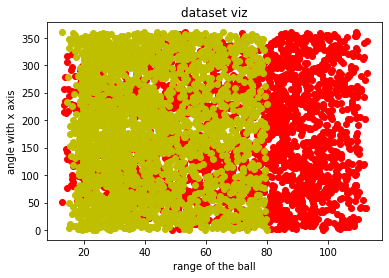

In [17]:
#plotting dataset
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
x_axis_0 = []
x_axis_1 = []
y_axis_0 = []
y_axis_1 = []
z_axis_0 = []
z_axis_1 = []

dataset = df # from experiment 1
for i in range(5000):
    if dataset.iloc[i,26]==0:
        y_axis_0.append(dataset.iloc[i,3])
        x_axis_0.append(dataset.iloc[i,2])
        #z_axis_0.append(dataset.iloc[i,0])
    else:
        y_axis_1.append(dataset.iloc[i,3])
        x_axis_1.append(dataset.iloc[i,2])
        #z_axis_1.append(dataset.iloc[i,0])

plt.figure()
#ax = plt.axes(projection="3d")
plt.scatter(x_axis_0,y_axis_0,c='r')
plt.scatter(x_axis_1,y_axis_1,c='y')
plt.xlabel('range of the ball')
plt.ylabel('angle with x axis')
#ax.set_zlabel('speed of the ball')
plt.title('dataset viz')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0, test_size = 0.1, shuffle = True)

In [375]:
no_of_caught = 0
for i in out:
    if i==1:
        no_of_caught+=1
no_of_caught

6335

In [ ]:
# implementing k-fold cross validation
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 6)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)



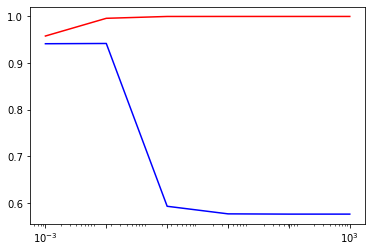

In [390]:
train_scores_mean = np.mean(train_scores,axis=1)
test_scores_mean = np.mean(test_scores,axis=1)
plt.figure()
plt.semilogx(param_range,train_scores_mean,color='r')
plt.semilogx(param_range,test_scores_mean,color='b')
plt.xticks(param_range)
plt.show()

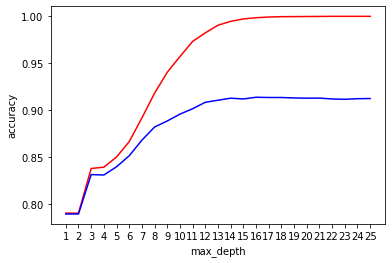

In [407]:
param_range = range(1,26,1)

train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X, y,
                                            param_name='max_depth',
                                            param_range=param_range, cv=3)
train_scores_mean = np.mean(train_scores,axis=1)
test_scores_mean = np.mean(test_scores,axis=1)
plt.figure()
plt.plot(param_range, train_scores_mean, color='r')
plt.plot(param_range, test_scores_mean, color='b')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(param_range)
plt.show()

In [452]:
# reduced training and testing data 
reduce_train_data_to = 1000
reduce_test_data_to = 100
X_train_new = X_train[:reduce_train_data_to]
y_train_new = y_train[:reduce_train_data_to]
X_test_new = X_test[:reduce_test_data_to]
y_test_new = y_test[:reduce_test_data_to]

clf_new = RandomForestClassifier(max_features=22,n_estimators=12,random_state=0,max_depth=12) # reduced n_estimators to make the model less complex
clf_new.fit(X_train_new,y_train_new)
print('score on test dataset=',clf_new.score(X_test_new,y_test_new))
print('score on train dataset=',clf_new.score(X_train_new,y_train_new))

score on test dataset= 0.93
score on train dataset= 0.993
